In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

<function matplotlib.pyplot.show(close=None, block=None)>

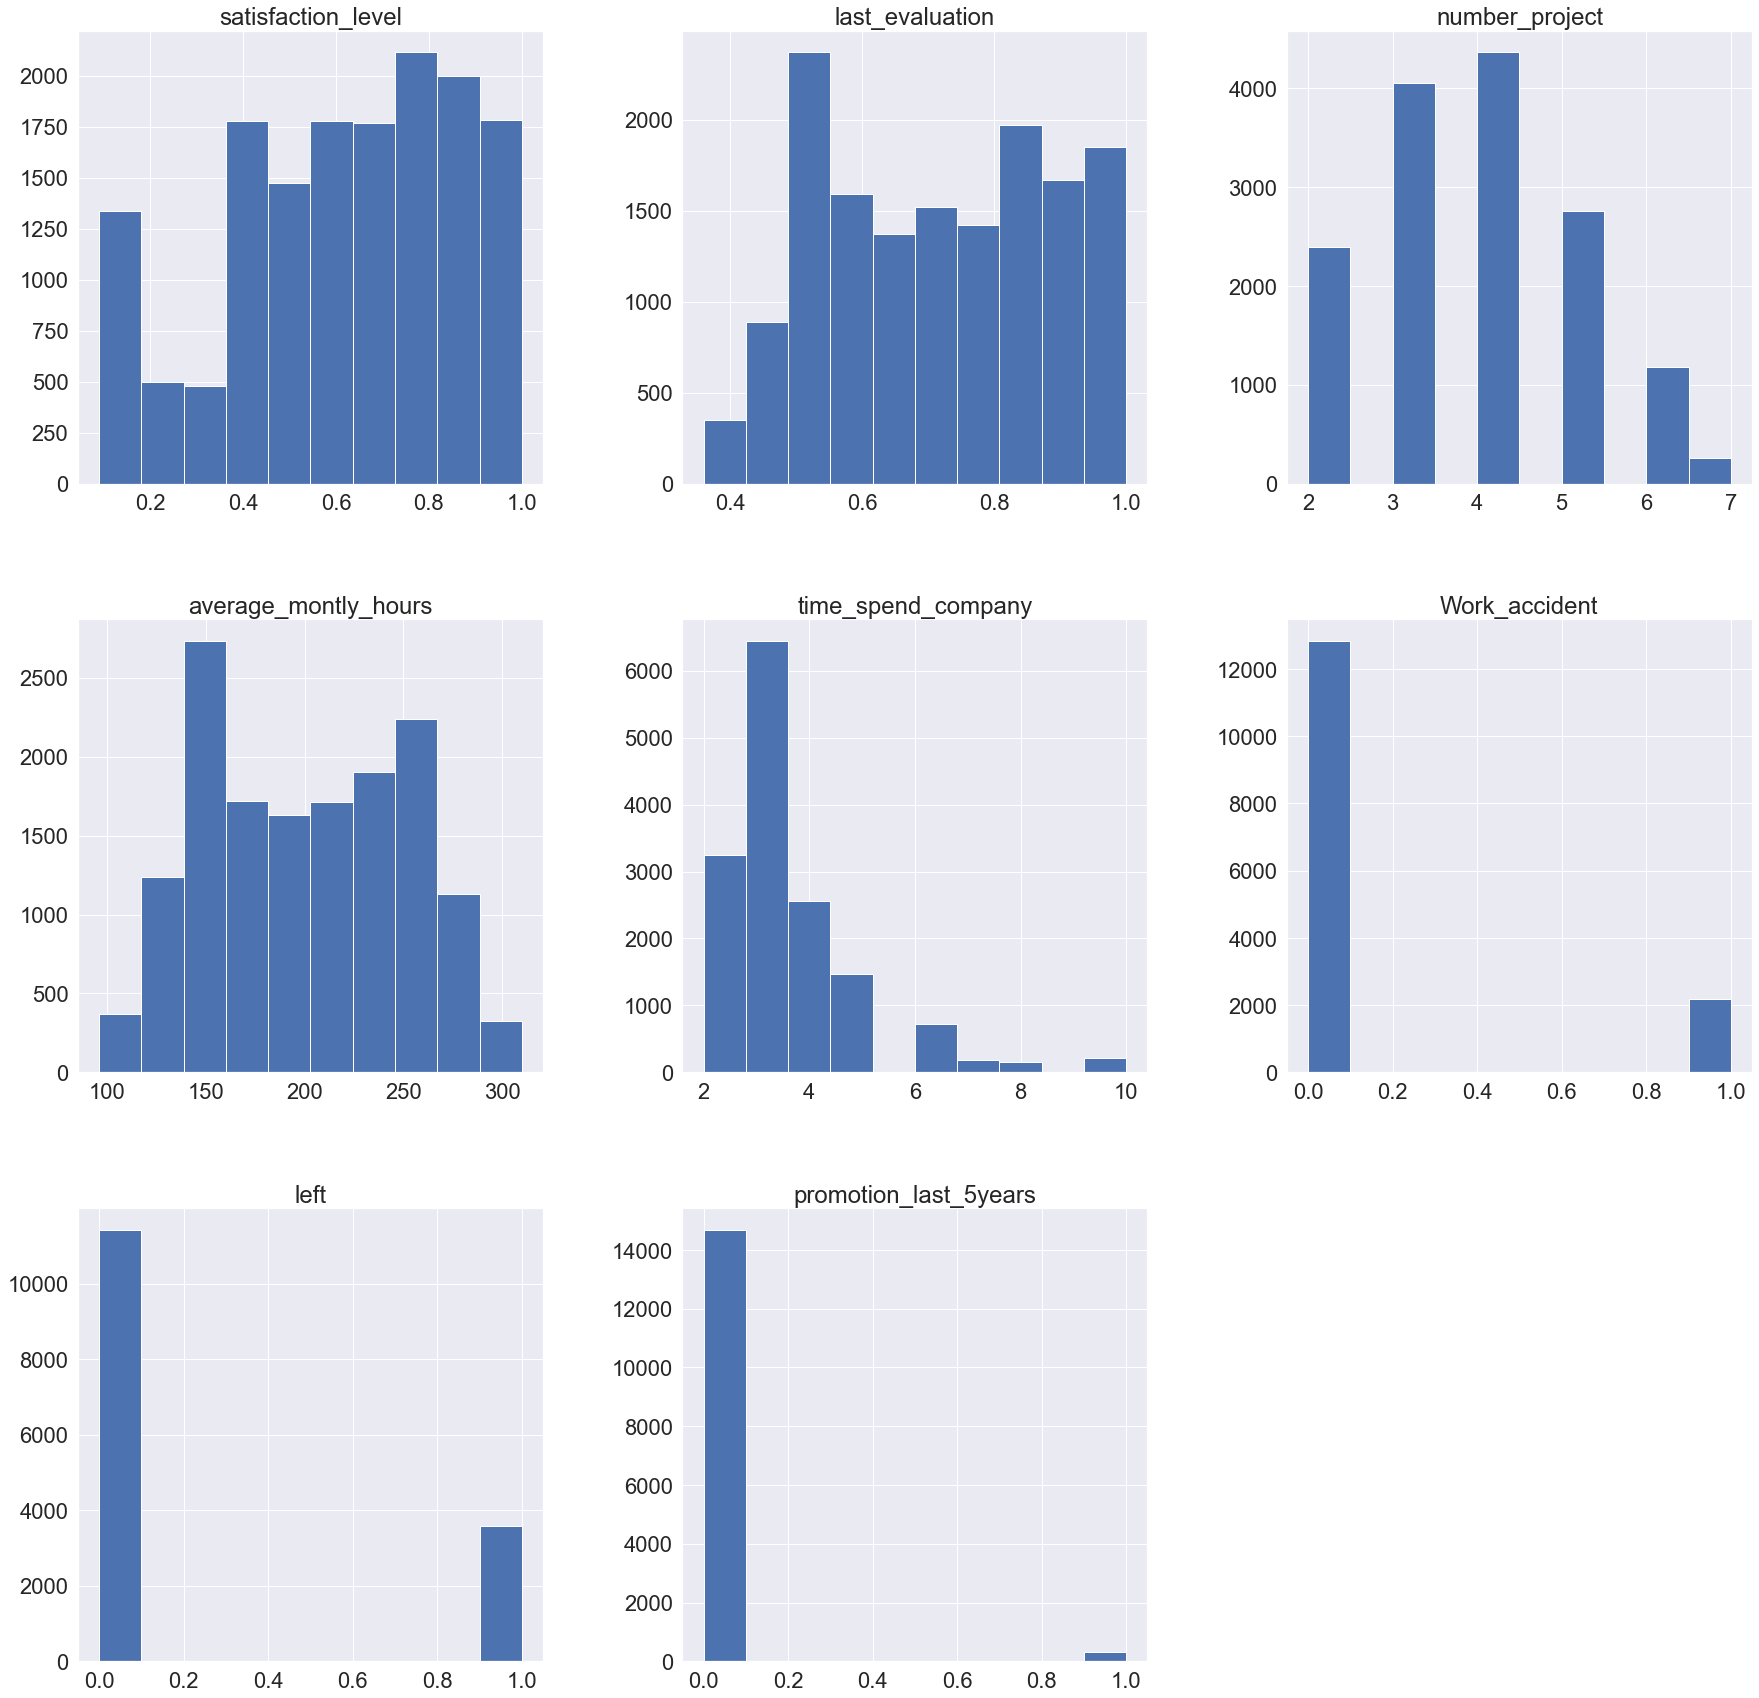

In [4]:
sns.set(font_scale=2)
df.hist(figsize=(30,30))

plt.show

In [5]:
grouped = df.groupby('left').mean()
grouped

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Text(0, 0.5, 'Left')

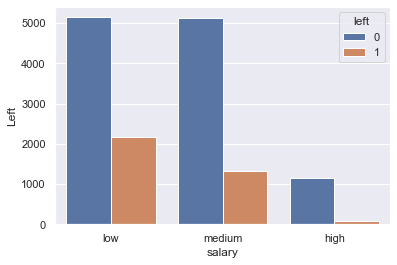

In [6]:
sns.set(font_scale=1)
plt.xlabel("Salary")
sns.countplot(x = "salary" ,hue = "left", data = df,)
plt.ylabel("Left")

Text(0, 0.5, 'Left')

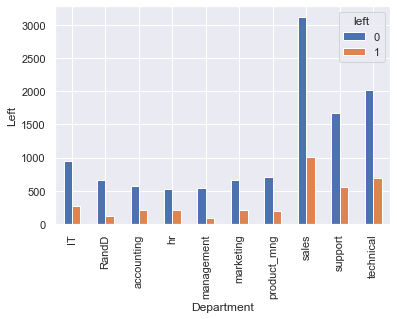

In [14]:
sns.set(font_scale=1)

pd.crosstab(df.sales,df.left).plot(kind='bar')
plt.xlabel("Department")
plt.ylabel("Left")

In [8]:
categorical_values = list(df.columns)

In [9]:
categorical_values.remove("left")

In [10]:
categorical_values

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'sales',
 'salary']

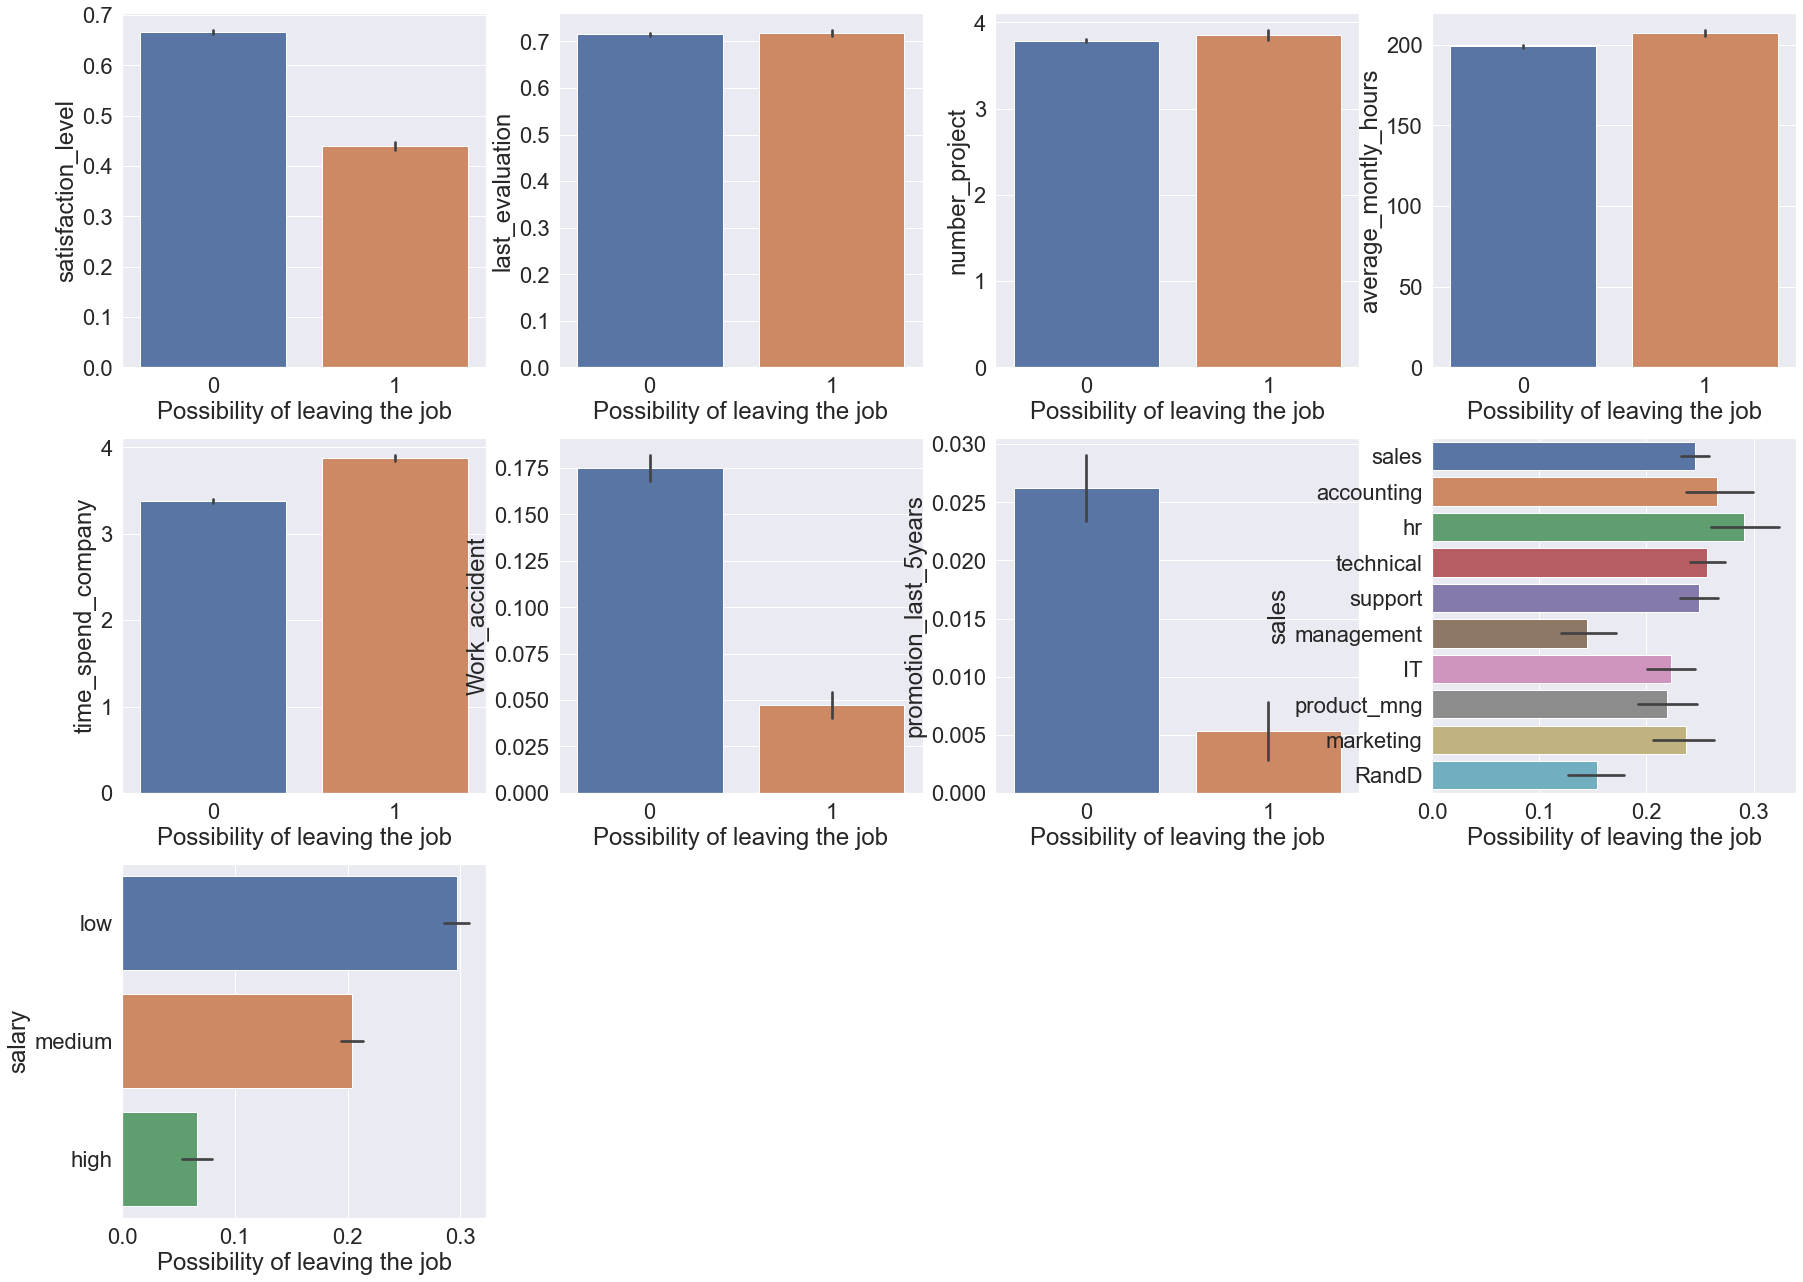

In [11]:
plt.figure(figsize=(30,30))
sns.set(font_scale=2)

for i, col in enumerate(categorical_values,1):
    plt.subplot(4,4,i)
    sns.barplot(x="left", y=f"{col}", data = df)
    plt.ylabel(f"{col}")
    plt.xlabel("Possibility of leaving the job")

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [51]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [52]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [53]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [54]:
df_with_dummies.drop(['salary','salary_medium'],axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [55]:
X = df_with_dummies
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [56]:
y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [58]:
model = LogisticRegression()

In [59]:
model.fit(X_train,y_train)

LogisticRegression()

In [60]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
model.score(X_test,y_test)

0.7768571428571428

In [62]:
model.predict_proba(X_test)

array([[0.41051459, 0.58948541],
       [0.79017539, 0.20982461],
       [0.91782179, 0.08217821],
       ...,
       [0.61699124, 0.38300876],
       [0.84752513, 0.15247487],
       [0.97178358, 0.02821642]])